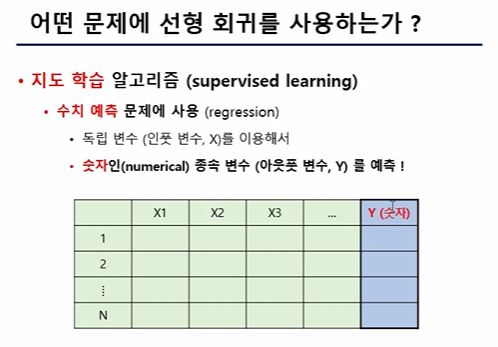

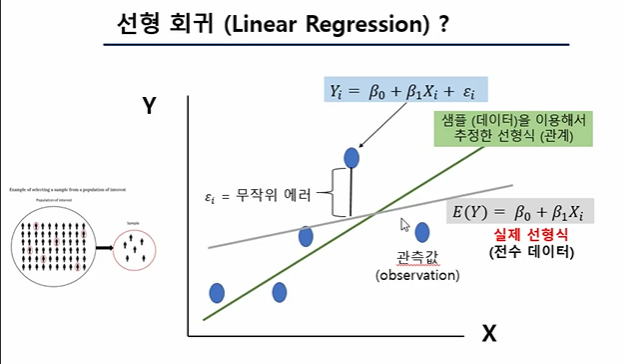

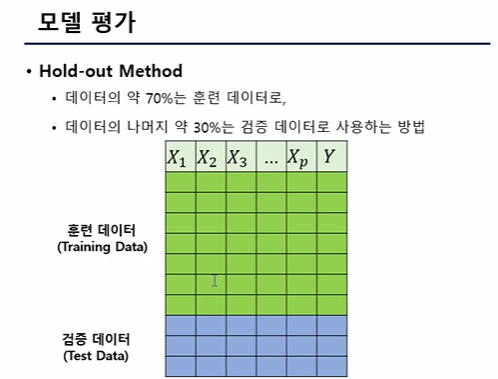

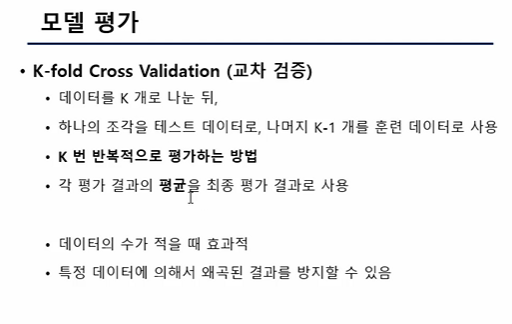

# 선형회귀 모델 사용 방법

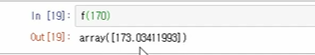

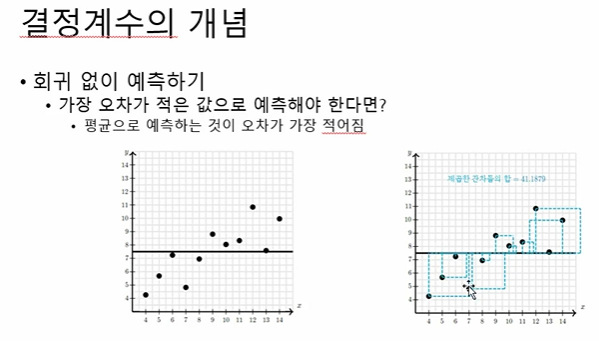

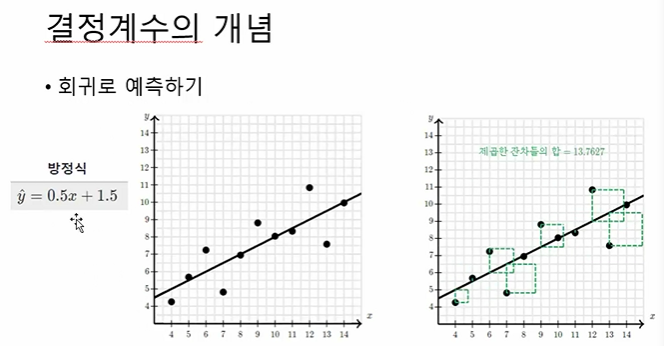

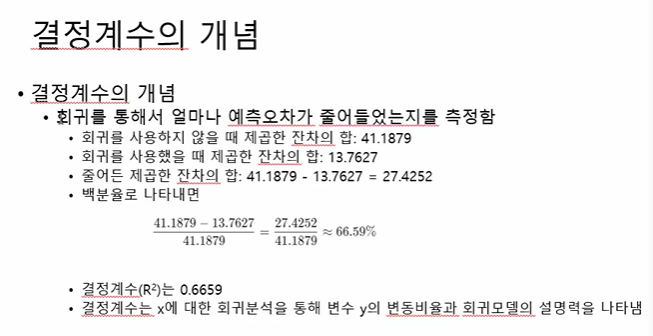

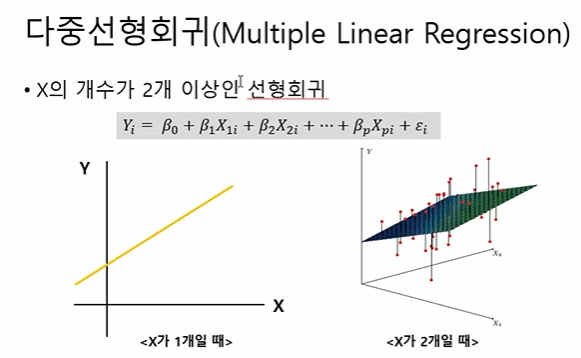

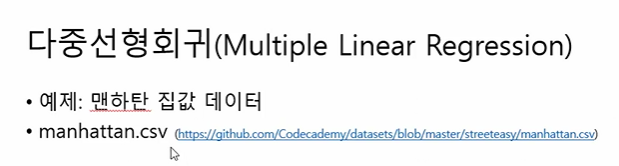

-------------

# 데이터 불러오기

In [24]:
import pandas as pd

In [44]:
# 깃허브 데이터로드
# 깃허브의 데이터를 사용하기 위해선 raw데이터를 로드해야합니다.

url = "https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/manhattan.csv"

In [52]:
manhattan = pd.read_csv(url)

In [53]:
manhattan.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [54]:
manhattan.shape

(3539, 18)

# 산점도 행렬

In [56]:
corr_matrix = manhattan.corr()

# 타겟값을 기준으로 관계가 높은 다른 특성들을 정렬해서 역순으로 나열해봅시다.

corr_matrix["rent"].sort_values(ascending=False)

rent                1.000000
size_sqft           0.857954
bathrooms           0.769474
bedrooms            0.638336
floor               0.215867
has_washer_dryer    0.053873
has_dishwasher      0.052241
has_elevator        0.051860
has_gym             0.040609
has_roofdeck        0.035165
min_to_subway       0.035164
has_doorman         0.031302
has_patio           0.029302
no_fee             -0.101497
building_age_yrs   -0.128895
rental_id          -0.134347
Name: rent, dtype: float64

In [67]:
corr_df = pd.DataFrame(corr_matrix["rent"].sort_values(ascending=False))

In [68]:
corr_df

,rent
rent,1.000000
size_sqft,0.857954
bathrooms,0.769474
bedrooms,0.638336
floor,0.215867
has_washer_dryer,0.053873
has_dishwasher,0.052241
has_elevator,0.051860
has_gym,0.040609
has_roofdeck,0.035165


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

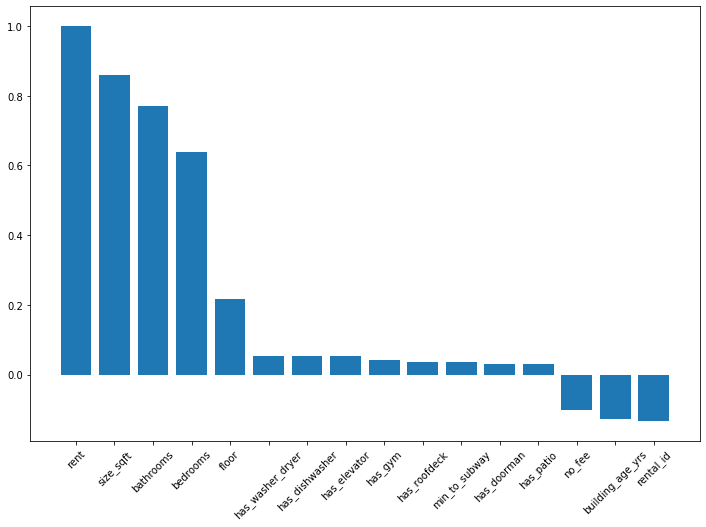

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.bar(corr_df.index, corr_df["rent"])
plt.xticks(rotation=45)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A9BAFC888>,
      dtype=object)

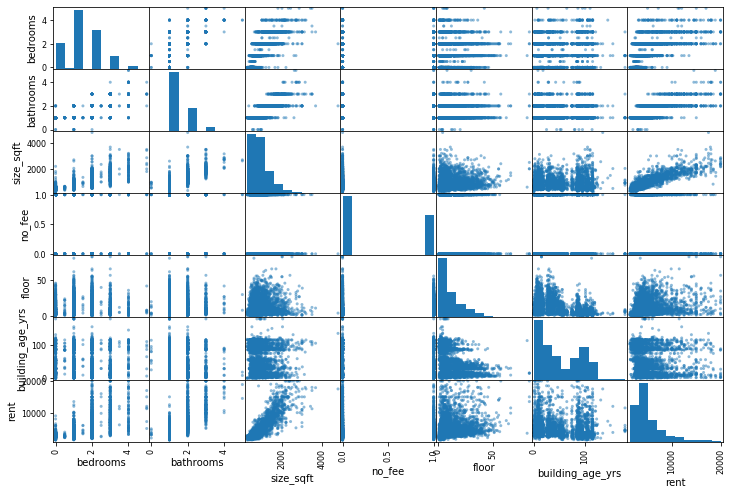

In [81]:
from pandas.plotting import scatter_matrix

attributes = ['bedrooms','bathrooms','size_sqft','no_fee','floor','building_age_yrs','rent']
scatter_matrix(manhattan[attributes], figsize=(12, 8))

### 데이터 준비하기

In [82]:
from sklearn.model_selection import train_test_split

x = manhattan[['bedrooms','bathrooms','size_sqft','min_to_subway','floor','building_age_yrs','no_fee','has_roofdeck','has_washer_dryer','has_doorman','has_elevator','has_dishwasher','has_patio','has_gym']]
y = manhattan[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3)

In [83]:
x

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
2,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
3,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
4,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1
3535,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1
3536,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0
3537,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1


In [84]:
y

,rent
0,2550
1,11500
2,4500
3,4795
4,17500
...,...
3534,4210
3535,6675
3536,1699
3537,3475


## 모델 만들기

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 모델 테스트하기

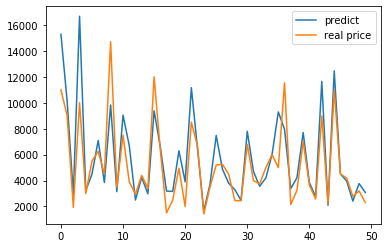

In [100]:
plt.plot(mlr.predict(x_test[:50]), label="predict")
plt.plot(y_test[:50].values.reshape(-1, 1), label="real price")
plt.legend()

In [87]:
my_apt = [[1,1,600,16,1,8,1,0,1,0,0,1,1,0]]
mlr.predict(my_apt)

array([[2954.89054955]])

In [101]:
y_predict = mlr.predict(x_test)

In [102]:
import matplotlib.pyplot as plt

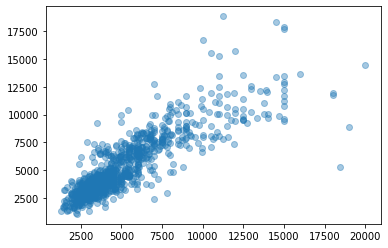

In [103]:
plt.scatter(y_test, y_predict, alpha = 0.4)
plt.show()

In [106]:
print(mlr.score(x_train, y_train))

0.7935756199928734


## 회귀계수

In [14]:
print(mlr.coef_)

[[-305.38964251 1293.5876887     4.87838484  -16.51321167   25.31988885
    -6.12383044  -73.44735132   59.24099215  188.17598548 -117.53223395
    64.28533363  -73.45600512  -71.8887583    74.69306964]]


## 변수별 상관 확인

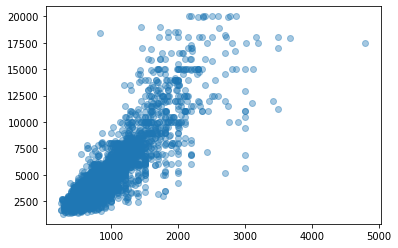

In [15]:
plt.scatter(manhattan[['size_sqft']],manhattan[['rent']], alpha = 0.4)
plt.show()

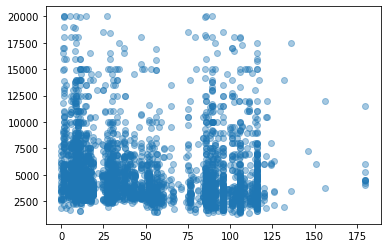

In [16]:
plt.scatter(manhattan[['building_age_yrs']],manhattan[['rent']], alpha = 0.4)
plt.show()

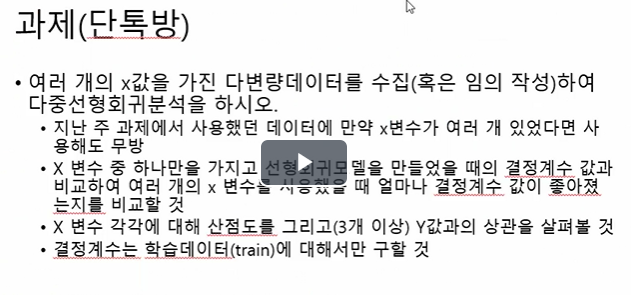

In [8]:
# df라는 변수명으로 아파트 실거래 가격 데이터를 불러옵니다.
df = pd.read_csv("C:/Users/김동현/Desktop/코인/data/아파트실거래가dataset/4th_Competition/train.csv")

In [9]:
# 데이터셋이 너무 크기 때문에 연남동의 아파트데이터를 새로운 변수에 할당합니다.
df2 = df[df['dong'] == '연남동']

# 데이터 준비하기

In [13]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
x = df2[['exclusive_use_area', 'year_of_completion', 'transaction_year_month', 'floor']]
y = df2[['transaction_real_price']]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3)

# 모델 만들기

In [15]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 모델 테스트하기

In [16]:
# exclusive_use_area	year_of_completion	transaction_year_month	floor
my_apt = [[100, 2010, 20150515, 15]]
print(mlr.predict(my_apt))
print("\n")
print("테스트한 my_apt의 가격은",int(mlr.predict(my_apt)))

[[2.91286945e+08]]


테스트한 my_apt의 가격은 291286944


# x변수 하나만 이용해 선형회귀 모델 만들기

In [17]:
x = df2[['exclusive_use_area']]
y = df2[['transaction_real_price']]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3)

In [18]:
mlr = LinearRegression()
mlr.fit(x_train.values.reshape(-1,1), y_train)

x = df2[['exclusive_use_area']]
y = df2[['transaction_real_price']]

In [19]:
my_apt2 = [[100]]
print(mlr.predict(my_apt2))

[[49181.57431097]]


In [20]:
y_predict = mlr.predict(x_test)

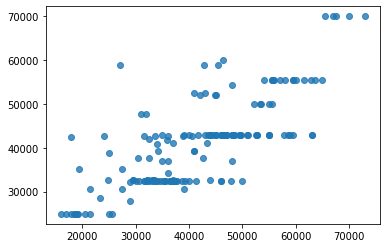

In [21]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha = 0.8)
plt.show()

In [67]:
# x변수를 하나만 입력했을 경우 결정계수가 0.556의 값을 가짐
print(mlr.score(x_train, y_train))

0.5576487915058361


In [68]:
x = df2[['exclusive_use_area', 'year_of_completion', 'transaction_year_month', 'floor']]
y = df2[['transaction_real_price']]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3)

In [69]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
my_apt = [[100, 2010, 20150515, 15]]
print(mlr.predict(my_apt))
print("\n")
print("테스트한 my_apt의 가격은",int(mlr.predict(my_apt)))

[[2.78863737e+08]]


테스트한 my_apt의 가격은 278863737


In [71]:
y_predict = mlr.predict(x_test)

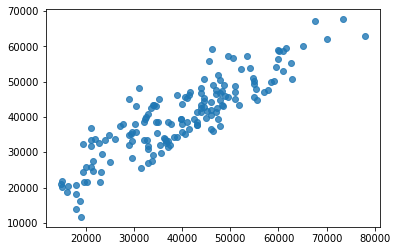

In [72]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha = 0.8)
plt.show()

In [73]:
# x변수를 여러개 입력했을 경우 결정계수가 0.748의 값을 가짐
# 결정계수 값이 약 0.19 상승함.
print(mlr.score(x_train, y_train))

0.7388683316248952


In [34]:
print(mlr.coef_)

[[357.11460801 229.68856613  13.8545327  754.30135185]]


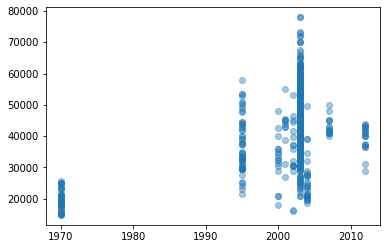

In [35]:
# 완공년도와 실거래가격의 상관확인
plt.scatter(df2[['year_of_completion']],df2[['transaction_real_price']], alpha = 0.4)
plt.show()

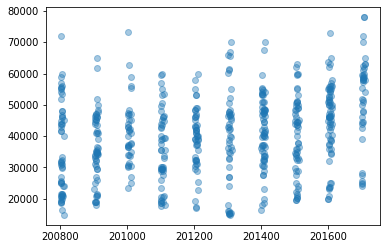

In [36]:
# 결재 일자와 실거래 가격의 상관 확인
plt.scatter(df2[['transaction_year_month']],df2[['transaction_real_price']], alpha = 0.4)
plt.show()

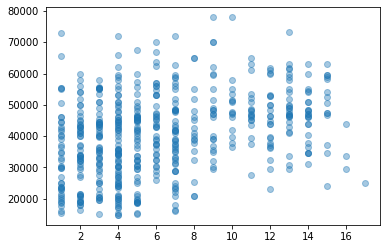

In [37]:
# 아파트 층수와 실거래 가격의 상관확인
plt.scatter(df2[['floor']],df2[['transaction_real_price']], alpha = 0.4)
plt.show()

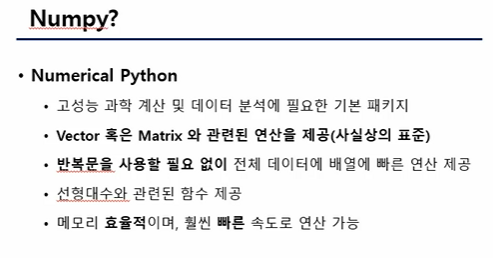

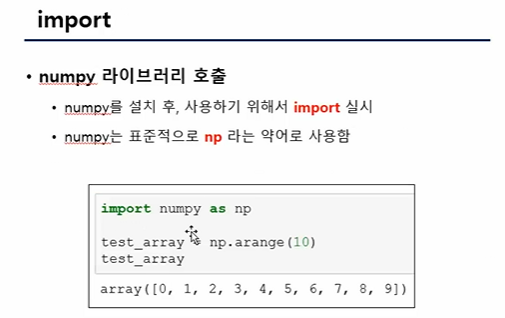

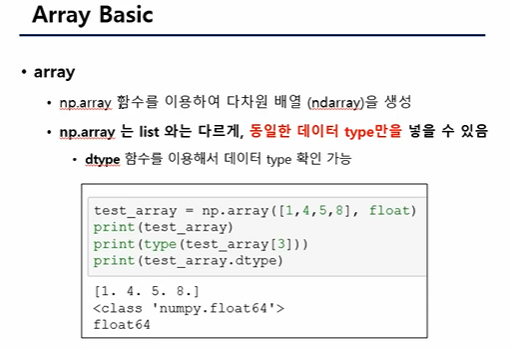

# Import Numpy

In [1]:
import numpy as np

In [39]:
np.array([1,2,3])

array([1, 2, 3])

In [40]:
test_array = np.array([1,4,5,8], float)

In [41]:
print(test_array)
print(type(test_array[3]))
print(test_array.dtype)

[1. 4. 5. 8.]
<class 'numpy.float64'>
float64


In [42]:
test_array[3]

8.0

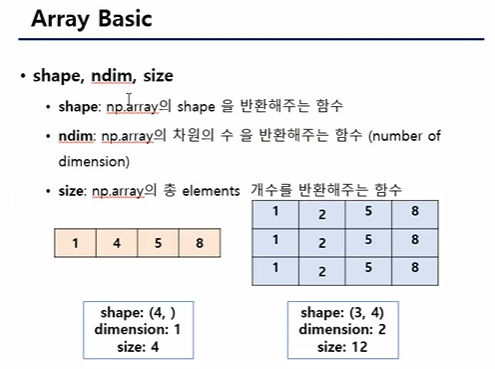

In [43]:
# (행,열)
test_array.shape

(4,)

In [44]:
# n차원
test_array.ndim

1

In [45]:
# elements 개수
test_array.size

4

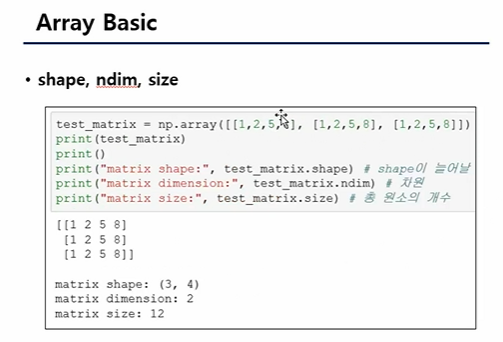

In [46]:
test_matrix = np.array([[1,2,3,8], [5,6,7,8]])
print(test_matrix)
print()
print("matrix shape:", test_matrix.shape)
print("matrix ndim:", test_matrix.ndim)
print("matrix size:", test_matrix.size)

[[1 2 3 8]
 [5 6 7 8]]

matrix shape: (2, 4)
matrix ndim: 2
matrix size: 8


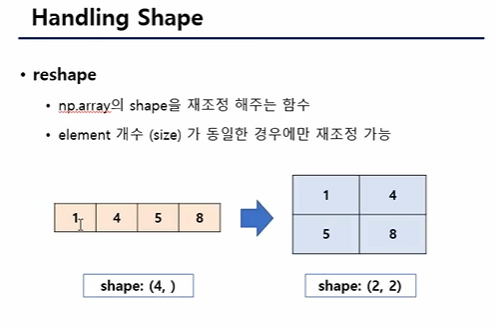

# Reshape

In [14]:
test_matrix = np.array([[1,2,3,8], [5,6,7,8]])
print(test_matrix)
print()
print("matrix shape:", test_matrix.shape)
print("matrix ndim:", test_matrix.ndim)
print("matrix size:", test_matrix.size)

[[1 2 3 8]
 [5 6 7 8]]

matrix shape: (2, 4)
matrix ndim: 2
matrix size: 8


In [23]:
reshape_mat = test_matrix.reshape(8,)
print(reshape_mat)
print("reshape_mat shape", reshape_mat.shape)
print("reshape_mat ndim", reshape_mat.ndim)

[1 2 3 8 5 6 7 8]
reshape_mat shape (8,)
reshape_mat ndim 1


In [48]:
test_matrix.reshape(2,4)

array([[1, 2, 3, 8],
       [5, 6, 7, 8]])

In [49]:
test_matrix.reshape(-1,2) # -1은 자동으로 값을 할당하고자 할 때 사용

array([[1, 2],
       [3, 8],
       [5, 6],
       [7, 8]])

# flatten

In [50]:
test_matrix.flatten() # flatten 함수는 다차원의 array를 1차원으로 변환시켜준다.

array([1, 2, 3, 8, 5, 6, 7, 8])

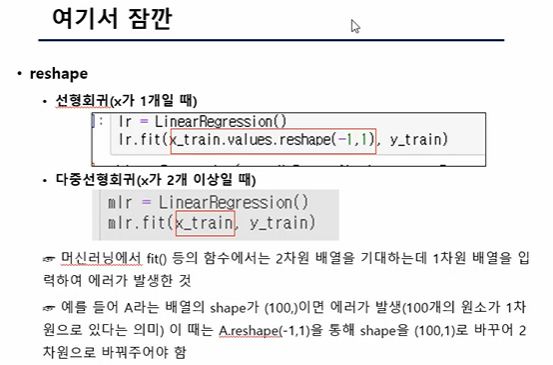